# Part 3: Boston Data Exploration

### INSTRUCTIONS:
Boston data (property assessments, 2017): https://drive.google.com/drive/folders/1UzuC3T8Y5M2DC-Q-d-DWimKJ72vuXjdu?usp=sharing

Explore the data, and create an iPython notebook in which you present three visualizations with
interesting insights or trends.

**As part of these visualizations, you must demonstrate your ability to pick appropriate colors
and color scales. Your visualizations must include an example of color coding by each of the
three canonical scales: quantitative, diverging, and categorical. (Use of ColorBrewer to pick your
color schemes is very strongly recommended.)

For each visualization you create, include in a Markup a couple sentences a) describing and
justifying your visual encoding / design choices, b) describing what the plot is showing (what is
the interesting insight or trend), and c) justifying your color choices.
NOTE: Now that we have covered cognitive principles, the importance of text and annotation,
and message and data redundancy, we expect you to use these concepts to justify and inform
your visualization designs.

Please Note: I've created 4 visualizations. 3 visualizations exist to cover requirements.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

In [2]:
# read in the data and perform some data exploration
df = pd.read_csv("/Users/emilydutile/repositories/info-viz/hw4/property_assesment.csv")
df.head()

,_id,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,1,0100001000_,NaN,0100001000_,104 A 104,PUTNAM,ST,NaN,02128_,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0100002000_,NaN,0100002000_,197,LEXINGTON,ST,NaN,02128_,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0100003000_,NaN,0100003000_,199,LEXINGTON,ST,NaN,02128_,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0100004000_,NaN,0100004000_,201,LEXINGTON,ST,NaN,02128_,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0100005000_,NaN,0100005000_,203,LEXINGTON,ST,NaN,02128_,104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check out rows and columns
df.shape

(500, 76)

In [4]:
# get an idea of the data
df.describe()

,_id,PTYPE,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,...,S_UNIT_RES,S_UNIT_COM,S_UNIT_RC,U_BASE_FLOOR,U_NUM_PARK,U_TOT_RMS,U_BDRMS,U_FULL_BTH,U_HALF_BTH,U_FPLACE
count,500.000000,500.00000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,493.000000,489.000000,433.000000,4.940000e+02,...,20.000000,20.0,20.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,250.500000,200.39800,4.975991e+05,1.059858e+06,1.557457e+06,4.819454e+05,3250.468560,1840.952965,1321.478060,7.093704e+03,...,6.300000,0.0,0.0,2.061069,0.076336,3.580153,1.465649,1.053435,0.068702,0.290076
std,144.481833,261.54048,5.291472e+06,1.061699e+07,1.589434e+07,5.401253e+05,22715.791088,361.402351,943.683075,5.682859e+04,...,5.611079,0.0,0.0,1.345967,0.319093,1.122869,0.693904,0.225763,0.253918,0.533328
min,1.000000,13.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,260.000000,0.000000,0.000000,0.000000e+00,...,2.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,125.750000,102.00000,0.000000e+00,2.120500e+05,2.847750e+05,2.725072e+05,1088.000000,1899.000000,0.000000,7.657500e+02,...,3.000000,0.0,0.0,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,250.500000,105.00000,1.219000e+05,3.013500e+05,4.214000e+05,4.396965e+05,1799.000000,1900.000000,1985.000000,2.938500e+03,...,4.500000,0.0,0.0,2.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000
75%,375.250000,105.00000,1.565250e+05,4.033250e+05,5.180095e+05,5.403805e+05,2500.000000,1910.000000,1999.000000,4.452000e+03,...,6.750000,0.0,0.0,3.000000,0.000000,4.000000,2.000000,1.000000,0.000000,0.500000
max,500.000000,995.00000,1.162948e+08,2.346967e+08,3.509915e+08,6.204386e+06,502965.000000,2015.000000,2016.000000,1.232512e+06,...,27.000000,0.0,0.0,5.000000,2.000000,6.000000,3.000000,2.000000,1.000000,2.000000


In [5]:
# count unique zipcodes
df.ZIPCODE.nunique()

3

In [6]:
df.ZIPCODE.unique()

array(['02128_', '02115_', '02215_'], dtype=object)

## 1. Square footage vs Cost in different towns (zip codes)

The idea of this visualization is to look to see how the properties assessed amoung the different towns compare to one another with respect to size (living area) and total property assessment (cost). To visualize this, a scatterplot was used by encoding the towns by zipcode in a categorical color map. The cost of the property in comparison to its sized based upon location is definitely interested (and expected, knowing the Boston market a bit). The East Boston (02128) area looks to have the more affortable housing per square footage, while Back Bay (02115) is the most expensive per square foot. The lighter colors felt harder to see with matplotlib, so I chose darker colors that stood out more.

In [7]:
# create empty arrays for processing
total = [0]*500
area = [0]*500
colors = ['#000']*500

# process the data and assign colors
for i in range(0,500):
        area[i] = df.LIVING_AREA.iloc[i]
        total[i] = df.AV_TOTAL.iloc[i]
        if (df.ZIPCODE[i] == '02128_'):
            colors[i]='#66c2a5'
        elif (df.ZIPCODE[i] == '02115_'):
            colors[i]='#fc8d62'
        elif (df.ZIPCODE[i] == '02215_'):
            colors[i]='#8da0cb'

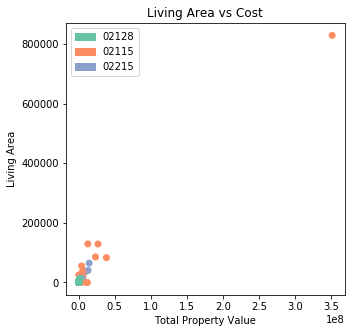

In [8]:
# plot the data for visualization 1
plt.figure(figsize=(5,5))            
plt.ylabel('Living Area')
plt.xlabel('Total Property Value')
plt.title('Living Area vs Cost')
c1 = mpatches.Patch(color='#66c2a5', label='02128')
c2 = mpatches.Patch(color='#fc8d62', label='02115')
c3 = mpatches.Patch(color='#8da0cb', label='02215')
plt.legend(handles=[c1, c2, c3])
plt.scatter(total, area, c=colors)
plt.show()

## 2. Number of properties per town (zip code)

To see the number of properties assessed in each town, I decided to make a simple bar chart and use a categorical color map in order to more easily tell which town (area code) is which. I personally just liked these distinct hues from ColorBrewer. As anticipated with supply and demand, it looks like there are fewer homes in the Back Bay area, which makes sense that price would be driven up - but I'm not sure how this property assessment data was gathered, meaning, are these homes newly sold or on the market, etc.

In [9]:
# get the zip codes to plot the data
zipcode_counts = df['ZIPCODE'].value_counts()
print(zipcode_counts)

02128_    324
02115_    107
02215_     69
Name: ZIPCODE, dtype: int64


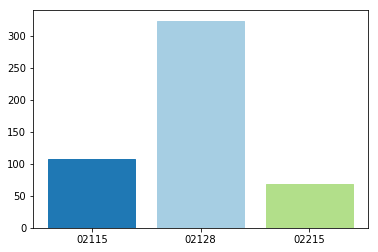

In [10]:
# plot the data
a1 = zipcode_counts[0]
a2 = zipcode_counts[1]
a3 = zipcode_counts[2]
barlist = plt.bar(['02128','02115','02215'],[a1,a2,a3])
barlist[0].set_color('#a6cee3')
barlist[1].set_color('#1f78b4')
barlist[2].set_color('#b2df8a')
plt.show()

## 3. Square footage, year built/remodeled and value assessment

This visualization focusing on the square footage (living area) of a home, the year it was built/remodeled, and the total property value (cost/price). Using a scatterplot, the data is encoded with a sequencial color map (from colorbrewer) to show the price ranges (quantitative value), effectively employing the luminosity channel and using one hue. Due to some missing data, there are some points that show a high price point but the living area is 0, so it misconstrues the graph data. As expected, we see a lot of homes that are larger is size being much more costly (a higher overall property assessment). I thought green would be a good color since we're looking at money.

In [11]:
# create empty arrays for processing
year = [0]*500
area = [0]*500
colors = ['#']*500

# process the data and assign colors
for i in range(0,500):
        area[i]= df.LIVING_AREA.iloc[i]
        if area[i]==0: 
            area[i]=np.mean(df.LIVING_AREA)
        year[i] = max(df.YR_BUILT.iloc[i], df.YR_REMOD.iloc[i])
        if year[i]==0: 
            year[i]=np.mean(df.YR_BUILT)
        if (df.AV_TOTAL[i] >= 0 and df.AV_TOTAL[i] < 100000): 
            colors[i]='#f7fcf5'
        elif (df.AV_TOTAL[i] >= 100000 and df.AV_TOTAL[i] < 200000): 
            colors[i]='#e5f5e0'
        elif (df.AV_TOTAL[i] >= 200000 and df.AV_TOTAL[i] < 300000): 
            colors[i]='#c7e9c0'
        elif (df.AV_TOTAL[i] >= 300000 and df.AV_TOTAL[i] < 400000): 
            colors[i]='#a1d99b'
        elif (df.AV_TOTAL[i] >= 400000 and df.AV_TOTAL[i] < 500000): 
            colors[i]='#74c476'
        elif (df.AV_TOTAL[i] >= 500000 and df.AV_TOTAL[i] < 600000): 
            colors[i]='#41ab5d'
        elif (df.AV_TOTAL[i] >= 600000 and df.AV_TOTAL[i] < 700000): 
            colors[i]='#238b45'
        elif (df.AV_TOTAL[i] >= 700000 and df.AV_TOTAL[i] < 800000): 
            colors[i]='#006d2c'
        else: 
            colors[i]='#00441b'

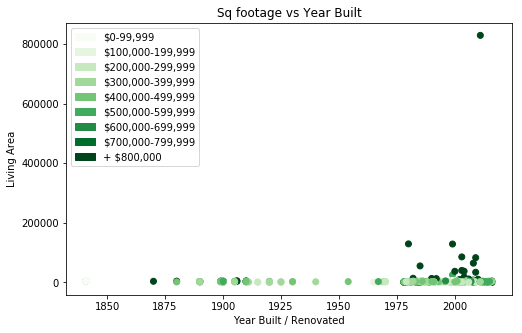

In [12]:
# plot the data for visualization 3
plt.figure(figsize=(8,5))            
plt.ylabel('Living Area')
plt.xlabel('Year Built / Renovated')
plt.title('Sq footage vs Year Built')
c1 = mpatches.Patch(color='#f7fcf5', label='$0-99,999')
c2 = mpatches.Patch(color='#e5f5e0', label='$100,000-199,999')
c3 = mpatches.Patch(color='#c7e9c0', label='$200,000-299,999')
c4 = mpatches.Patch(color='#a1d99b', label='$300,000-399,999')
c5 = mpatches.Patch(color='#74c476', label='$400,000-499,999')
c6 = mpatches.Patch(color='#41ab5d', label='$500,000-599,999')
c7 = mpatches.Patch(color='#238b45', label='$600,000-699,999')
c8 = mpatches.Patch(color='#006d2c', label='$700,000-799,999')
c9 = mpatches.Patch(color='#00441b', label='+ $800,000')
plt.legend(handles=[c1, c2, c3, c4, c5, c6,c7,c8,c9])
plt.scatter(year, area, c=colors)
plt.show()

## 4. Property Value, Year Built and Condition

Finally, we're going to look at the property value, which year it was built/remodeled and use a diverging color map in order to shed some light into the house condition. With the rating of poor to excellent, a diverging color map gives equal emphasis on mid-range critical values and
extremes. It's fairly expected to see the majority of the houses in average to good condition, and the more recently built/renovated homes look to be in better condition.

In [13]:
# create empty arrays for processing
year = [0]*500
value = [0]*500
colors = ['#000000']*500

# process the data and assign colors
for i in range(0,500):
        value[i]= df.AV_TOTAL.iloc[i]
        if value[i]==0:
            value[i]=np.mean(df.AV_TOTAL)
        year[i] = max(df.YR_BUILT.iloc[i], df.YR_REMOD.iloc[i])
        if year[i] == 0:
            year[i]=np.mean(df.YR_BUILT)
        if (df.R_INT_CND[i]=='E' or df.U_INT_CND[i]=='E'): 
            colors[i]='#1a9641'
        elif (df.R_INT_CND[i]=='G' or df.U_INT_CND[i]=='G'): 
            colors[i]='#a6d96a'
        elif (df.R_INT_CND[i]=='A' or df.U_INT_CND[i]=='A'): 
            colors[i]='#ffffbf'
        elif (df.R_INT_CND[i]=='F' or df.U_INT_CND[i]=='F'): 
            colors[i]='#fdae61'
        elif (df.R_INT_CND[i]=='P' or df.U_INT_CND[i]=='P'): 
            colors[i]='#d7191c'

In [14]:
# declare vars
k=0
keep = [True]*499
count=0

# process the data
for i in range(0,499):
    if colors[i] == '#000000':
        keep[i] = False
    else: 
        count += 1

newYear = [2017]*count
newVal = [2000000]*count
newColors = ['#ffffff']*count

# process the data
for i in range(0,count):
    if keep[i] == True:
        newYear[k] = year[i]
        newVal[k] = value[i]
        newColors[k] = colors[i]
        k = k+1

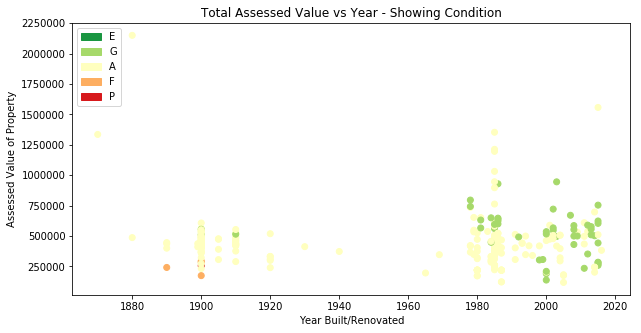

In [15]:
# plot the data for visaluzation 4
plt.figure(figsize=(10,5))
plt.ylabel('Assessed Value of Property')
plt.xlabel('Year Built/Renovated')
plt.title('Total Assessed Value vs Year - Showing Condition')
c1 = mpatches.Patch(color='#1a9641', label='E')
c2 = mpatches.Patch(color='#a6d96a', label='G')
c3 = mpatches.Patch(color='#ffffbf', label='A')
c4 = mpatches.Patch(color='#fdae61', label='F')
c5 = mpatches.Patch(color='#d7191c', label='P')
plt.legend(handles=[c1, c2, c3, c4, c5])
plt.scatter(newYear, newVal, c=newColors)
plt.show()